In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
d1 = pd.read_csv("D:\\AI_stuff\\dataset\\mnist_train.csv")

d1.head()

l = d1['label']

d = d1.drop('label',axis=1)


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


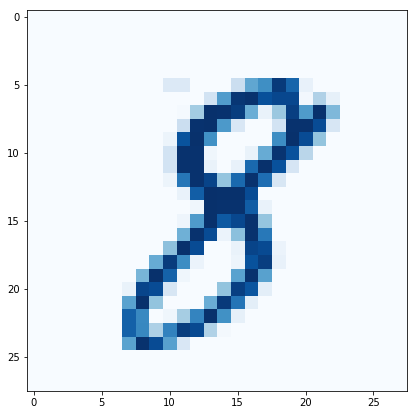

8


In [3]:
plt.figure(figsize=(7,7))
idx = 20

grid_data = d.iloc[idx].as_matrix().reshape(28,28)
plt.imshow(grid_data,interpolation='none',cmap = 'Blues')

plt.show()

print(l[idx])

In [4]:
labels = l.head(42000)
data = d.head(42000)

print(data.shape)

(42000, 784)


In [5]:
from sklearn.preprocessing import StandardScaler
standardized_data = StandardScaler().fit(data).transform(data)
print(standardized_data.shape)

(42000, 784)


In [6]:
sample_data = standardized_data

covmat = np.matmul(sample_data.T,sample_data)

print(covmat.shape)


(784, 784)


In [7]:
from scipy.linalg import eigh

values,vectors = eigh(covmat,eigvals=(782,783))

print(values)

print(vectors.shape)

vectors=vectors.T

print(vectors.shape)

[1222652.44613786 1709211.41082575]
(784, 2)
(2, 784)


In [8]:
import matplotlib.pyplot as plt

new_coord  = np.matmul(vectors,sample_data.T)

print(new_coord.shape)

(2, 42000)


In [9]:
import pandas as pd
print(labels.shape)
new_coord1 = np.vstack((new_coord,labels)).T

print(new_coord1.shape)

(42000,)
(42000, 3)


In [10]:
df = pd.DataFrame(new_coord1,columns = ('1stprinciple','2ndprinciple','labels'))

print(df.head())

   1stprinciple  2ndprinciple  labels
0     -5.226445     -5.140478     1.0
1      6.032996     19.292332     0.0
2     -1.705813     -7.644503     1.0
3      5.836139     -0.474207     4.0
4      6.024818     26.559574     0.0


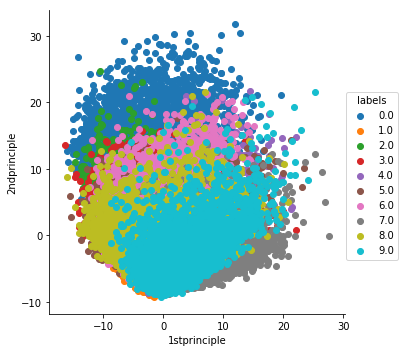

In [11]:
import seaborn as sb

sb.FacetGrid(df,hue='labels',size=5).map(plt.scatter,'1stprinciple','2ndprinciple').add_legend()

plt.show()

In [12]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)

pca_data = pca.fit_transform(sample_data)



print(pca_data.shape)

(42000, 2)


In [13]:
pca_data1 = np.vstack((pca_data.T,labels)).T

print(pca_data1.shape)


(42000, 3)


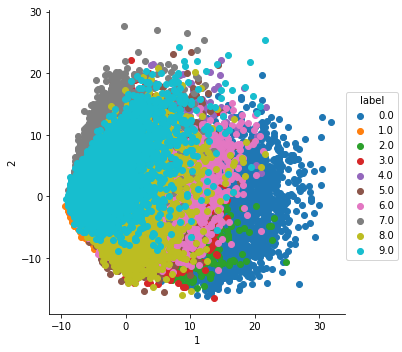

In [14]:
pca_data1 = pd.DataFrame(pca_data1,columns=('1','2','label'))

sb.FacetGrid(pca_data1,hue ='label',size=5)\
  .map(plt.scatter,'1','2').add_legend()
plt.show() 

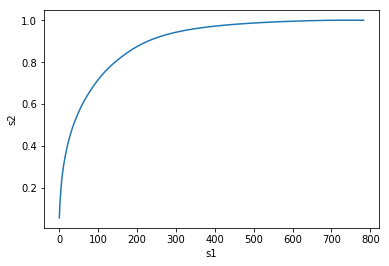

In [15]:
pca = PCA(n_components = 784)


pca_tran = pca.fit(sample_data).transform(sample_data)


pca_data2 = pca.explained_variance_  / np.sum(pca.explained_variance_)

cum_sum = np.cumsum(pca_data2)

plt.figure(1)

plt.plot(cum_sum)

plt.xlabel('s1')
plt.ylabel('s2')
plt.show()

Using t-SNE scikit learn

1
3


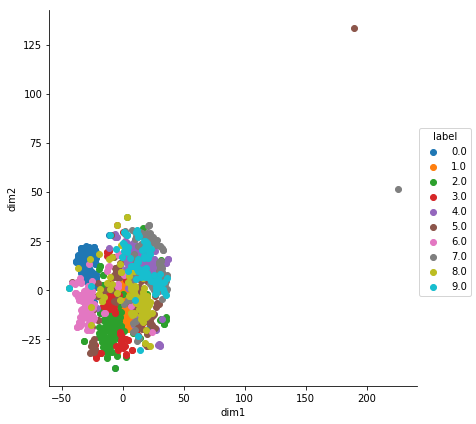

In [18]:
from sklearn.manifold import TSNE
print(1)
model = TSNE(n_components = 2,random_state = 0,perplexity = 50,n_iter = 5000)

tsne_stan = standardized_data[0:1000,:]
tsne_label = labels[0:1000]

tsne_data  =model.fit_transform(tsne_stan)

tsne_data = np.vstack((tsne_data.T,tsne_label)).T

tsne_df = pd.DataFrame(tsne_data, columns = ('dim1' , 'dim2', 'label'))

(sb.FacetGrid(tsne_df,hue=  'label',size = 6).map(plt.scatter,'dim1','dim2').add_legend())

print(3)

plt.show()